In [62]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime



In [63]:
symbol = "NVDA"
stock = yf.Ticker(symbol)
df = stock.history(period="5y")
df.reset_index(inplace=True)

In [47]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-21 00:00:00-04:00,7.031843,7.093117,6.653238,6.713017,735160000,0.0,0.0
1,2020-04-22 00:00:00-04:00,6.905308,7.170332,6.859726,7.127490,483356000,0.0,0.0
2,2020-04-23 00:00:00-04:00,7.169585,7.301598,7.049029,7.074186,424160000,0.0,0.0
3,2020-04-24 00:00:00-04:00,7.063974,7.215167,6.989249,7.213174,352328000,0.0,0.0
4,2020-04-27 00:00:00-04:00,7.347679,7.559648,7.323020,7.399737,479388000,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-04-14 00:00:00-04:00,114.110001,114.290001,109.070000,110.709999,264705000,0.0,0.0
1253,2025-04-15 00:00:00-04:00,110.970001,113.620003,110.500000,112.199997,228966900,0.0,0.0
1254,2025-04-16 00:00:00-04:00,104.550003,106.790001,100.449997,104.489998,397016900,0.0,0.0
1255,2025-04-17 00:00:00-04:00,104.449997,104.470001,100.050003,101.489998,290833400,0.0,0.0


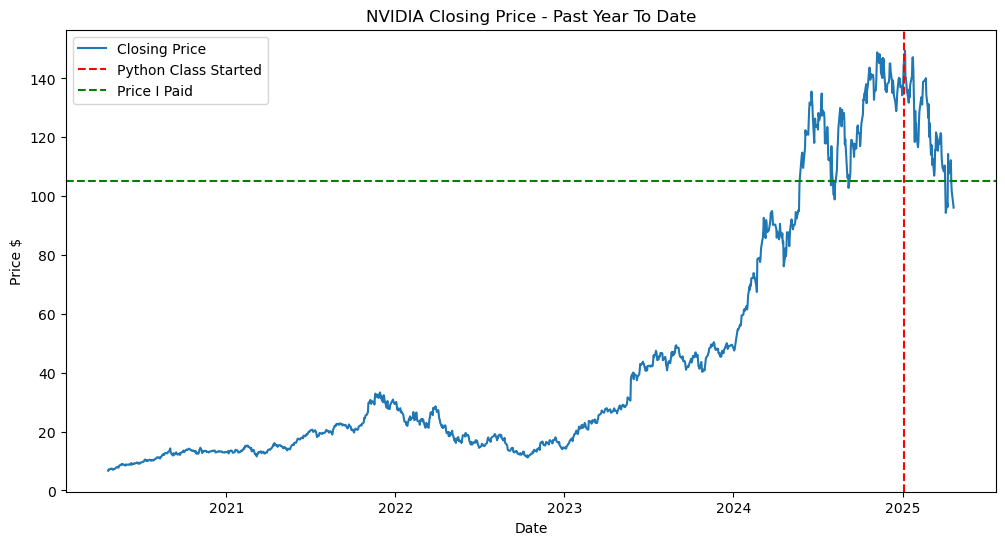

In [48]:
classbegan = datetime.datetime(2025, 1,3 )
mypurchaseprice = 105.0
plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()


In [49]:
X = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp).values.reshape(-1, 1)
Y = df['Close'].values.reshape(-1, 1)                                                     



In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

modellr = LinearRegression()
modellr.fit(X, Y)


predictions = modellr.predict(X)





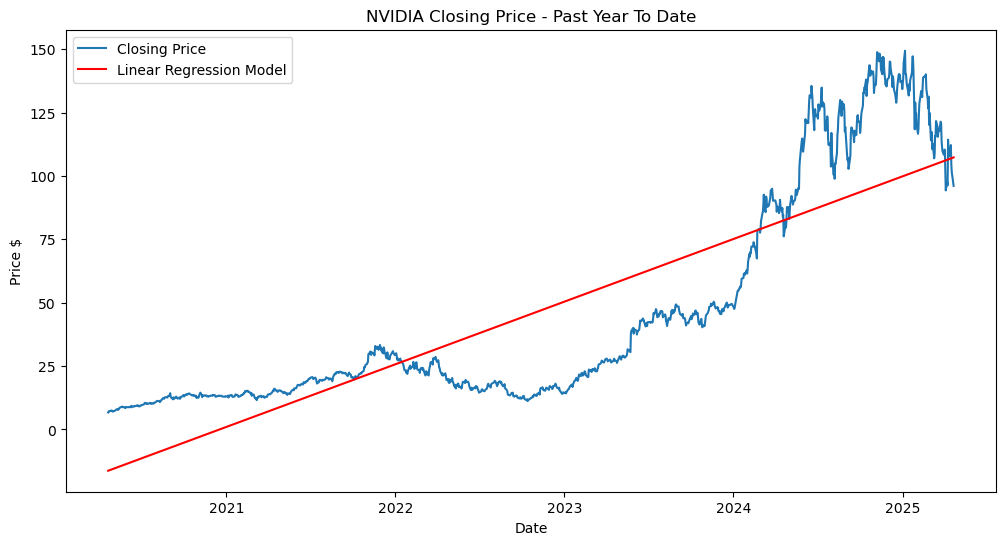

In [51]:
#
# Plot the Linear Regression, showing the actual vs predicted!
#
#

plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

#plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
#plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')



plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()



In [60]:

X = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp).values.reshape(-1, 1)
Y = df['Close'].values.reshape(-1, 1)                                                     


#
# Generate Polynomial Features
#
polyf = PolynomialFeatures( degree=20)

x_poly = polyf.fit_transform(X)

modelp = LinearRegression()
modelp.fit( x_poly, Y)

y_poly_predictions = modelp.predict( x_poly)




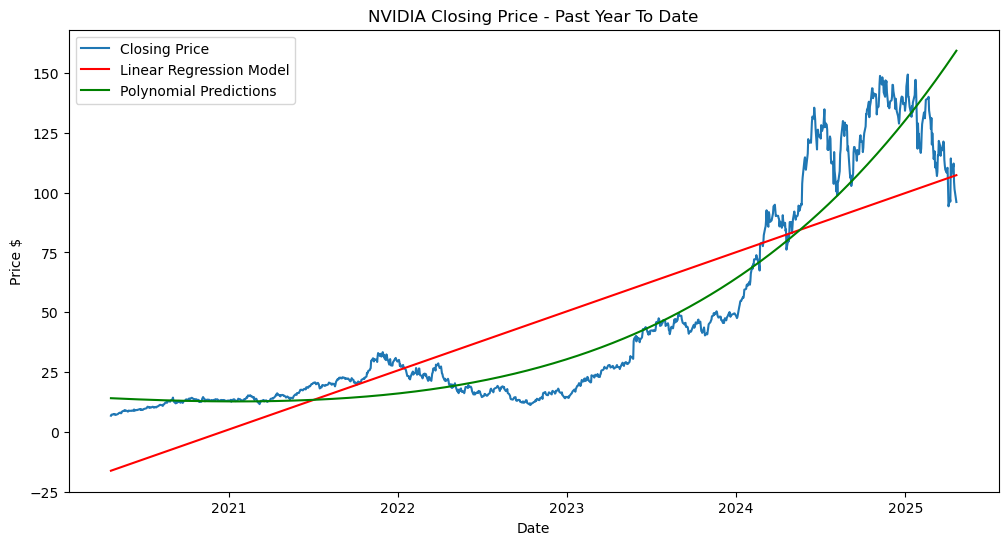

In [61]:
#
# Plot the Linear Regression, showing the actual vs predicted!
#
#

plt.figure(figsize=(12, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

#plt.axvline( classbegan, color='red', label=("Python Class Started"), linestyle='--')
#plt.axhline( mypurchaseprice, color='green', label=("Price I Paid"), linestyle='--')


plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )
plt.plot(df['Date'], y_poly_predictions, label='Polynomial Predictions', color='green')

plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()


In [ ]:

def CreateStockFeatures( my_stock_data):
    """ 
    Create a new dataframe from the input dataframe, add columns for rolling means of closing prices
    and standaard deviation of closing prices

    Args:
        Source Dataframe obtained from Yahoo Finance
    Returns:
      A Paandas dataframe with new columns of dayofyear, dayofmonth, last_week_rolling_mean, last_4week_rolling_mean, last_2day_rolling_mean, last_week_rolling_std, last_4week_rolling_std, last_2day_rolling_std
    Caveats:
      The resulting dataframe does not contain NaN values. They are filled using the method='bfill'AdvancedModels.ipynb
    """
    featuredf = my_stock_data.copy()

  #  featuredf['dayofweek'] = featuredf['Date'].dt.day
  #  featuredf['quarter'] = featuredf.index.quarter
  #  featuredf['month'] = featuredf.index.month
    featuredf['dayofyear'] = featuredf['Date'].dt.dayofyear
    featuredf['dayofmonth']= featuredf['Date'].dt.day

    featuredf['last_week_rolling_mean'] = df['Close'].rolling(window=7).mean()
    featuredf['last_4week_rolling_mean'] = df['Close'].rolling(window=28).mean()
    featuredf['last_2day_rolling_mean'] = df['Close'].rolling(window=2).mean()

    featuredf['last_week_rolling_std'] = df['Close'].rolling(window=7).std()
    featuredf['last_4week_rolling_std'] = df['Close'].rolling(window=28).std() 
    featuredf['last_2day_rolling_std'] = df['Close'].rolling(window=2).std() 

    featuredf.fillna(method='bfill', inplace=True)


    return featuredf

In [106]:
#
# How about a different model
# One that uses even MORE CPU?
#
#
# Random Forest....
#

my_stock_features = CreateStockFeatures(df)


cool_feature_columns = ['last_week_rolling_mean','last_4week_rolling_mean','last_week_rolling_std','last_4week_rolling_std', 'last_2day_rolling_mean', 'last_2day_rolling_std']
#cool_feature_columns = ['last_week_rolling_mean','last_4week_rolling_mean']


modelrf = RandomForestRegressor( n_estimators=5, random_state=42)
modelrf.fit(my_stock_features[cool_feature_columns], my_stock_features['Close'] )

rf_predictions = modelrf.predict( my_stock_features[ cool_feature_columns]   )



C:\Users\spier\AppData\Local\Temp\ipykernel_4568\624705733.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  featuredf.fillna(method='bfill', inplace=True)


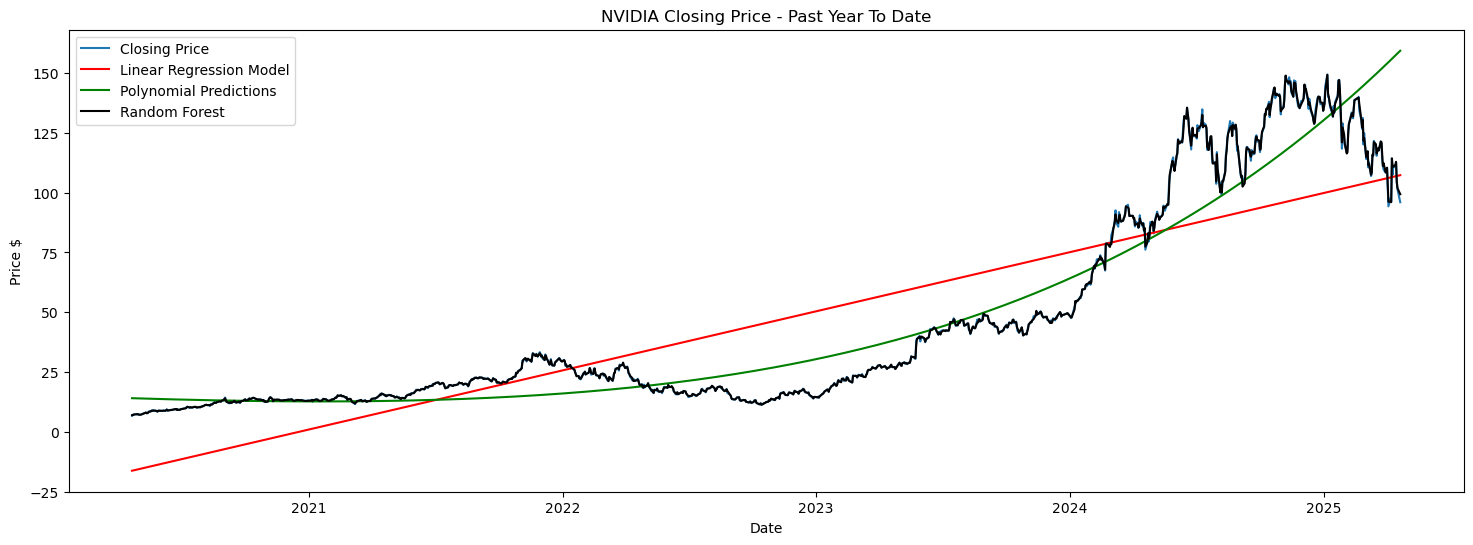

In [107]:
#
# Plot the Linear Regression, showing the actual vs predicted!
# The PolyFit
# and Random Forest

plt.figure(figsize=(18, 6 ) )
plt.plot( df['Date'], df['Close'], label='Closing Price')

plt.plot( df['Date'], predictions, label="Linear Regression Model", color='red' )
plt.plot( df['Date'], y_poly_predictions, label='Polynomial Predictions', color='green')
plt.plot( df['Date'],  rf_predictions, label="Random Forest", color='black'  )


plt.title("NVIDIA Closing Price - Past Year To Date")
plt.xlabel("Date")
plt.ylabel("Price $")
plt.legend()
plt.show()